In [3]:
import geopandas as gpd

In [4]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
tf.config.experimental_run_functions_eagerly(True)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow import keras 

Opening file::

In [5]:
ciy=gpd.read_file("C:/Users/Ritwik/Downloads/IBTrACS.WP.list.v04r00.lines.shp")

printing first 10 data:::

In [6]:
ciy.head(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min,geometry
0,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 16:00:00,NR,16.50,124.0,...,NaN,NaN,6,281,1884,6,24,16,0,"LINESTRING (124.00000 16.50000, 123.80005 16.5..."
1,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 18:00:00,NR,16.54,123.8,...,NaN,NaN,6,282,1884,6,24,18,0,"LINESTRING (123.80005 16.53729, 123.50000 16.5..."
2,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 21:00:00,NR,16.60,123.5,...,NaN,NaN,6,283,1884,6,24,21,0,"LINESTRING (123.50000 16.59782, 123.19995 16.6..."
3,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 00:00:00,NR,16.67,123.2,...,NaN,NaN,6,286,1884,6,25,0,0,"LINESTRING (123.19995 16.67063, 122.90002 16.7..."
4,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 03:00:00,NR,16.76,122.9,...,NaN,NaN,6,289,1884,6,25,3,0,"LINESTRING (122.90002 16.76335, 122.80005 16.8..."
5,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 04:00:00,NR,16.80,122.8,...,NaN,NaN,6,293,1884,6,25,4,0,"LINESTRING (122.80005 16.80000, 122.59998 16.8..."
6,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 06:00:00,NR,16.88,122.6,...,NaN,NaN,6,295,1884,6,25,6,0,"LINESTRING (122.59998 16.88277, 122.30005 17.0..."
7,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 09:00:00,NR,17.03,122.3,...,NaN,NaN,6,298,1884,6,25,9,0,"LINESTRING (122.30005 17.02593, 122.00000 17.1..."
8,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 12:00:00,NR,17.18,122.0,...,NaN,NaN,7,299,1884,6,25,12,0,"LINESTRING (122.00000 17.18355, 121.69995 17.3..."
9,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 15:00:00,NR,17.35,121.7,...,NaN,NaN,7,300,1884,6,25,15,0,"LINESTRING (121.69995 17.34625, 121.59998 17.4..."


Printing shape of raw data

In [7]:
ciy.shape

(232665, 169)

Taking first row of a data and dropping its succesive role

In [8]:
df=ciy.drop_duplicates(subset="SID", keep="first")

In [9]:
df.tail()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min,geometry
232435,2019324N15130,2019,54,WP,MM,FUNG-WONG,2019-11-19 12:00:00,NR,14.6,130.0,...,NaN,NaN,5,293,2019,11,19,12,0,"LINESTRING (130.00000 14.60000, 129.75244 14.6..."
232467,2019330N09151,2019,56,WP,MM,KAMMURI,2019-11-25 18:00:00,NR,9.2,151.0,...,NaN,NaN,18,305,2019,11,25,18,0,"LINESTRING (151.00000 9.20000, 150.26843 9.70069)"
232549,2019356N06140,2019,61,WP,MM,PHANFONE,2019-12-21 18:00:00,NR,6.1,139.7,...,NaN,NaN,8,305,2019,12,21,18,0,"LINESTRING (139.69995 6.10000, 139.35999 6.33507)"
232605,2020133N10129,2020,24,WP,MM,VONGFONG,2020-05-11 18:00:00,NR,9.6,128.8,...,NaN,NaN,5,350,2020,5,11,18,0,"LINESTRING (128.80005 9.60000, 128.77014 9.82749)"
232645,2020164N16120,2020,31,WP,MM,NURI,2020-06-12 00:00:00,NR,16.0,119.6,...,NaN,NaN,19,305,2020,6,12,0,0,"LINESTRING (119.59998 16.00000, 118.80359 16.5..."


In [10]:
df.shape

(4175, 169)

Making the required dataset

In [11]:
df1=df[['year','LON']]

In [12]:
df1.head()

,year,LON
0,1884,124.0
55,1884,125.2
100,1884,126.7
145,1884,128.5
190,1884,126.6


shape number of dataset and feature

In [13]:
df1.shape

(4175, 2)

In [14]:
df1.columns

Index(['year', 'LON'], dtype='object')

In [15]:
s=df1['year'].value_counts()

In [16]:
type(s)

pandas.core.series.Series

changing series to dataframe

In [17]:
import pandas as pd
df2 = pd.DataFrame({'year':s.index, 'count':s.values})
df2

,year,count
0,1971,64
1,1967,55
2,1961,54
3,1970,53
4,1965,53
...,...,...
132,1889,12
133,1901,12
134,1888,12
135,1885,9


In [18]:
#df2=df2.drop(df2.index[[136]])

In [19]:
co=df2['count']
co

0      64
1      55
2      54
3      53
4      53
       ..
132    12
133    12
134    12
135     9
136     2
Name: count, Length: 137, dtype: int64

In [20]:
# Import the acf module and the plot_acf module from statsmodels


Sorting data year wise

In [21]:
df2=df2.sort_values(by='year')

In [22]:
df2=df2.reset_index()



In [23]:
df2.drop(['index'], axis=1, inplace=True)

In [24]:
df2.head()

,year,count
0,1884,14
1,1885,9
2,1886,15
3,1887,21
4,1888,12


In [25]:
df2['count'][136] = 28

In [26]:
df2.loc[df2.year == 1971]

,year,count
87,1971,64


plot of dataset made

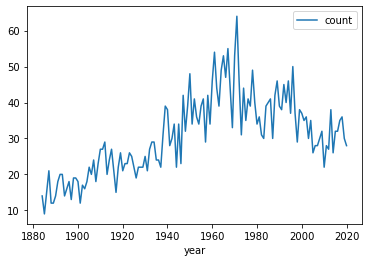

In [27]:
df2.plot(x='year',y='count')

In [28]:
df3=df2.reset_index()['count']

In [29]:
df3

0      14
1       9
2      15
3      21
4      12
       ..
132    32
133    35
134    36
135    30
136    28
Name: count, Length: 137, dtype: int64

In [30]:
import numpy as np

transforming the dataset between 0 and 1 for better processing

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [32]:
print(df3)

[[0.09090909]
 [0.        ]
 [0.10909091]
 [0.21818182]
 [0.05454545]
 [0.05454545]
 [0.09090909]
 [0.16363636]
 [0.2       ]
 [0.2       ]
 [0.09090909]
 [0.12727273]
 [0.16363636]
 [0.07272727]
 [0.18181818]
 [0.18181818]
 [0.16363636]
 [0.05454545]
 [0.14545455]
 [0.12727273]
 [0.16363636]
 [0.23636364]
 [0.2       ]
 [0.27272727]
 [0.16363636]
 [0.25454545]
 [0.32727273]
 [0.32727273]
 [0.36363636]
 [0.2       ]
 [0.27272727]
 [0.32727273]
 [0.21818182]
 [0.10909091]
 [0.23636364]
 [0.30909091]
 [0.21818182]
 [0.25454545]
 [0.25454545]
 [0.30909091]
 [0.29090909]
 [0.23636364]
 [0.18181818]
 [0.23636364]
 [0.23636364]
 [0.23636364]
 [0.29090909]
 [0.21818182]
 [0.32727273]
 [0.36363636]
 [0.36363636]
 [0.27272727]
 [0.27272727]
 [0.23636364]
 [0.4       ]
 [0.54545455]
 [0.52727273]
 [0.34545455]
 [0.38181818]
 [0.45454545]
 [0.23636364]
 [0.45454545]
 [0.25454545]
 [0.6       ]
 [0.41818182]
 [0.54545455]
 [0.70909091]
 [0.45454545]
 [0.58181818]
 [0.49090909]
 [0.45454545]
 [0.54

In [33]:
##splitting dataset into train and test split
training_size=int(len(df3)*0.75)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]

In [34]:
training_size

102

In [35]:
test_size

35

In [36]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [37]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [38]:
print(X_train.shape), print(y_train.shape)

(97, 4)
(97,)


(None, None)

In [39]:
print(X_test.shape), print(ytest.shape)

(30, 4)
(30,)


(None, None)

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
import tensorflow as tf
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
X_train.shape

(97, 4, 1)

In [43]:
import tensorflow as tf
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=X_train.shape[-2:]),
    tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])


In [44]:
simple_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [45]:
history=simple_lstm_model.fit(X_train,y_train,epochs=120,verbose=1)

Train on 97 samples
Epoch 1/120
97/97 [==============================] - 16s 169ms/sample - loss: 0.2517 - mae: 0.4424
Epoch 2/120
97/97 [==============================] - 0s 3ms/sample - loss: 0.2364 - mae: 0.4262
Epoch 3/120
97/97 [==============================] - 0s 3ms/sample - loss: 0.2236 - mae: 0.4120
Epoch 4/120
97/97 [==============================] - 0s 2ms/sample - loss: 0.2094 - mae: 0.3956
Epoch 5/120
97/97 [==============================] - 0s 3ms/sample - loss: 0.1963 - mae: 0.3807
Epoch 6/120
97/97 [==============================] - 0s 2ms/sample - loss: 0.1831 - mae: 0.3642
Epoch 7/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.1690 - mae: 0.3476
Epoch 8/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.1601 - mae: 0.3348
Epoch 9/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.1483 - mae: 0.3197
Epoch 10/120
97/97 [==============================] - 1s 8ms/sample - loss: 0.1364 - mae: 0.3047
Epoch 11/120
97/

97/97 [==============================] - 0s 1ms/sample - loss: 0.0164 - mae: 0.1012
Epoch 86/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0180 - mae: 0.1030
Epoch 87/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0174 - mae: 0.1028
Epoch 88/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0157 - mae: 0.0991
Epoch 89/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0162 - mae: 0.1012
Epoch 90/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0154 - mae: 0.1004
Epoch 91/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0166 - mae: 0.1034
Epoch 92/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0171 - mae: 0.1071
Epoch 93/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0178 - mae: 0.1075
Epoch 94/120
97/97 [==============================] - 0s 1ms/sample - loss: 0.0157 - mae: 0.1007
Epoch 95/120
97/97 [=======================

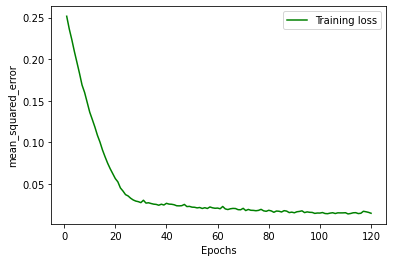

In [46]:
import matplotlib.pyplot as plt 
loss_train = history.history['loss']
#loss_val = history.history['val_loss']
epochs = range(1,121)
plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

In [47]:
### Lets Do the prediction and check performance metrics
train_predict=simple_lstm_model.predict(X_train)
test_predict=simple_lstm_model.predict(X_test)


In [48]:
##Transformback to original form
ytest.shape


(30,)

In [49]:
ytest1=np.reshape(ytest, (30, 1))

In [50]:
ytest1

array([[0.54545455],
       [0.52727273],
       [0.65454545],
       [0.56363636],
       [0.67272727],
       [0.50909091],
       [0.74545455],
       [0.50909091],
       [0.36363636],
       [0.52727273],
       [0.50909091],
       [0.47272727],
       [0.49090909],
       [0.38181818],
       [0.47272727],
       [0.30909091],
       [0.34545455],
       [0.34545455],
       [0.38181818],
       [0.41818182],
       [0.23636364],
       [0.34545455],
       [0.32727273],
       [0.52727273],
       [0.30909091],
       [0.41818182],
       [0.41818182],
       [0.47272727],
       [0.49090909],
       [0.38181818]])

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.12114193098083416

In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
ytest1=scaler.inverse_transform(ytest1)

In [53]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest1,test_predict))

5.119351192607028

In [54]:
from sklearn.metrics import r2_score
r2_score(ytest1,test_predict)

0.33475346993675814

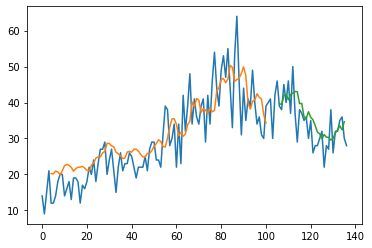

In [55]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [56]:
len(test_data)

35

In [57]:
x_input=test_data[31:].reshape(1,-1)
x_input.shape

(1, 4)

In [58]:


temp_input=list(x_input)
temp_input=temp_input[0].tolist()



In [59]:
temp_input

[0.4727272727272727,
 0.4909090909090909,
 0.3818181818181818,
 0.3454545454545454]

In [60]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<31):
    
    if(len(temp_input)>4):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} year input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = simple_lstm_model.predict(x_input, verbose=0)
        print("{} year output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = simple_lstm_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.45547304]
5
1 year input [0.49090909 0.38181818 0.34545455 0.45547304]
1 year output [[0.44459912]]
2 year input [0.38181818 0.34545455 0.45547304 0.44459912]
2 year output [[0.42931768]]
3 year input [0.34545455 0.45547304 0.44459912 0.42931768]
3 year output [[0.4413781]]
4 year input [0.45547304 0.44459912 0.42931768 0.44137809]
4 year output [[0.46525142]]
5 year input [0.44459912 0.42931768 0.44137809 0.46525142]
5 year output [[0.4652155]]
6 year input [0.42931768 0.44137809 0.46525142 0.4652155 ]
6 year output [[0.46914288]]
7 year input [0.44137809 0.46525142 0.4652155  0.46914288]
7 year output [[0.47860742]]
8 year input [0.46525142 0.4652155  0.46914288 0.47860742]
8 year output [[0.4871281]]
9 year input [0.4652155  0.46914288 0.47860742 0.48712811]
9 year output [[0.49146512]]
10 year input [0.46914288 0.47860742 0.48712811 0.49146512]
10 year output [[0.49729732]]
11 year input [0.47860742 0.48712811 0.49146512 0.49729732]
11 year output [[0.503728]]
12 year input [0.4

In [61]:
day_new=np.arange(1998,2021)
day_pred=np.arange(2020,2051)




In [62]:
len(df3)

137

In [63]:
df3.shape

(137, 1)

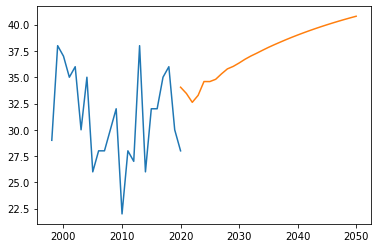

In [64]:
plt.plot(day_new,scaler.inverse_transform(df3[114:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [65]:
df4=df3.tolist()
df4.extend(lst_output)
df4=scaler.inverse_transform(df4).tolist()

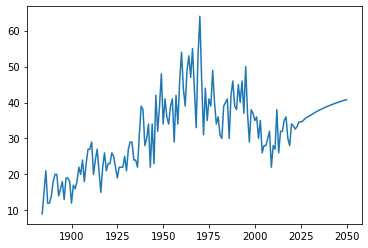

In [66]:
day_ne=np.arange(1884,2051)
plt.plot(day_ne,df4[1:])